In [ ]:
  !pip install opencv-python numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm  # Progress bar

# Paths (Change this to match your dataset location in Google Drive)
dataset_path = "/content/drive/My Drive/Lung Cancer Dataset/Data"
output_path = "/content/drive/My Drive/Lungcancer.Dataset.Enhanced"

# Create output folders (train, test, valid)
for split in ['train', 'test', 'valid']:
    for class_name in ['adenocarcinoma', 'squamous.cell.carcinoma', 'large.cell.carcinoma', 'normal']:
        os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

# Define CLAHE parameters
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))



# Function to apply CLAHE to a folder
def apply_clahe_to_folder(input_folder, output_folder):
    for class_name in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_name)
        output_class_path = os.path.join(output_folder, class_name)

        if not os.path.isdir(class_path):
            continue  # Skip non-directory files

        for filename in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read the image in grayscale
                img_path = os.path.join(class_path, filename)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if image is None:
                    print(f"Error loading {filename}, skipping...")
                    continue

                # Apply CLAHE
                enhanced_image = clahe.apply(image)
                enhanced_image = cv2.GaussianBlur(enhanced_image, (3,3), 0)


                # Save the enhanced image
                output_img_path = os.path.join(output_class_path, filename)
                cv2.imwrite(output_img_path, enhanced_image)

# Apply CLAHE to all datasets
for split in ['train', 'test', 'valid']:
    print(f"Enhancing {split} dataset...")
    apply_clahe_to_folder(os.path.join(dataset_path, split), os.path.join(output_path, split))

print("✅ CLAHE enhancement completed for all images!")


Enhancing train dataset...


Processing squamous.cell.carcinoma: 100%|██████████| 155/155 [00:07<00:00, 21.99it/s]


Enhancing test dataset...


Processing large.cell.carcinoma: 100%|██████████| 51/51 [00:19<00:00,  2.65it/s]


Enhancing valid dataset...


Processing squamous.cell.carcinoma: 100%|██████████| 15/15 [00:06<00:00,  2.36it/s]

✅ CLAHE enhancement completed for all images!


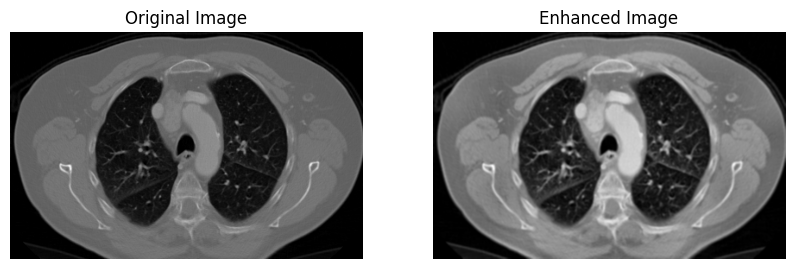

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Select a sample image from each class
sample_class = "adenocarcinoma"  # Change to any class
sample_filename = "000000 (6).png"  # Change to an actual filename in your dataset

# Paths to original and enhanced images
original_path = f"/content/drive/My Drive/Lung Cancer Dataset/Data/train/{sample_class}/{sample_filename}"
enhanced_path = f"/content/drive/My Drive/Lungcancer.Dataset.Enhanced/train/{sample_class}/{sample_filename}"

# Read images
original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
enhanced = cv2.imread(enhanced_path, cv2.IMREAD_GRAYSCALE)

# Display images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced, cmap="gray")
plt.title("Enhanced Image")
plt.axis("off")

plt.show()


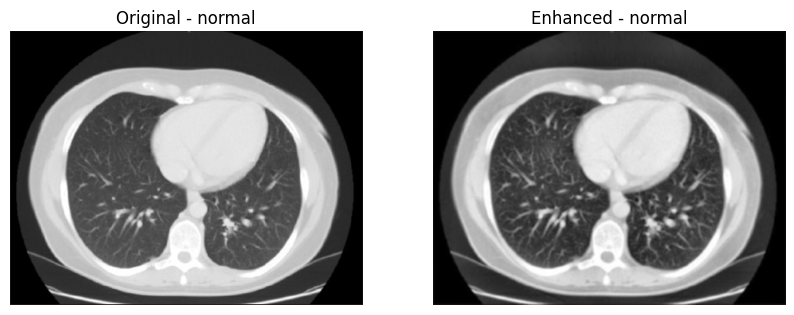

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
import os

# Choose a random class
random_class = random.choice(['adenocarcinoma', 'squamous.cell.carcinoma', 'large.cell.carcinoma', 'normal'])

# Paths to original and enhanced datasets
original_path = f"/content/drive/My Drive/Lung Cancer Dataset/Data/train/{random_class}"
enhanced_path = f"/content/drive/My Drive/Lungcancer.Dataset.Enhanced/train/{random_class}"

# Select a random image from the class
random_image_name = random.choice(os.listdir(original_path))

# Read original and enhanced images
original_image = cv2.imread(os.path.join(original_path, random_image_name), cv2.IMREAD_GRAYSCALE)
enhanced_image = cv2.imread(os.path.join(enhanced_path, random_image_name), cv2.IMREAD_GRAYSCALE)

# Display both images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title(f"Original - {random_class}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(enhanced_image, cmap='gray')
plt.title(f"Enhanced - {random_class}")
plt.axis("off")

plt.show()


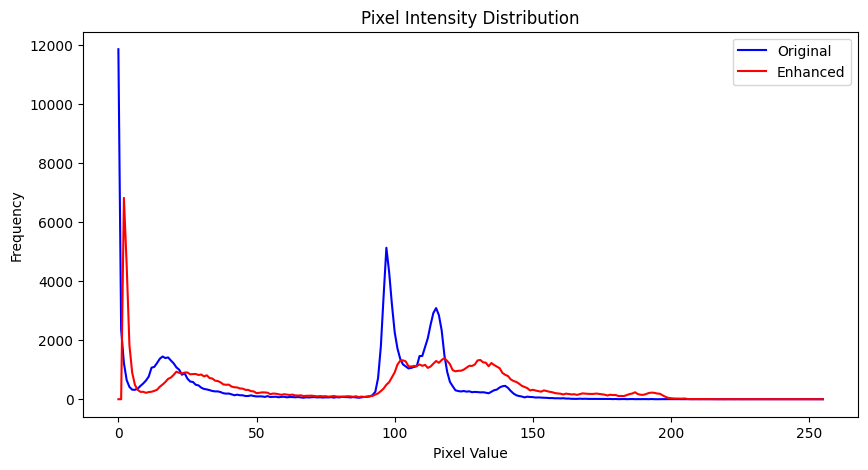

In [ ]:
import numpy as np

# Compute histograms
original_hist = cv2.calcHist([original], [0], None, [256], [0, 256])
enhanced_hist = cv2.calcHist([enhanced], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 5))
plt.plot(original_hist, color='blue', label='Original')
plt.plot(enhanced_hist, color='red', label='Enhanced')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
print(f"Original Mean: {np.mean(original)}, Std Dev: {np.std(original)}")
print(f"Enhanced Mean: {np.mean(enhanced)}, Std Dev: {np.std(enhanced)}")


Original Mean: 70.73397792101949, Std Dev: 48.71325836128983
Enhanced Mean: 85.90883159220567, Std Dev: 55.78302596285595


In [ ]:
from skimage.metrics import structural_similarity as ssim

ssim_score, _ = ssim(original, enhanced, full=True)
print(f"SSIM Score: {ssim_score}")


SSIM Score: 0.8580471460262404


In [ ]:
import cv2
import numpy as np

def calculate_psnr(original, enhanced):
    mse = np.mean((original - enhanced) ** 2)
    if mse == 0:
        return 100  # Perfect match
    psnr = 10 * np.log10((255 ** 2) / mse)
    return psnr

psnr_value = calculate_psnr(original, enhanced)
print(f"PSNR Score: {psnr_value:.2f} dB")


PSNR Score: 28.71 dB


In [ ]:
!pip install albumentations


In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import albumentations as A
from skimage.metrics import structural_similarity as ssim

# Paths (adjust these)
input_path = "/content/drive/My Drive/Lungcancer.Dataset.Enhanced"
output_path = "/content/drive/My Drive/Lungcancer.Dataset.Augmented"

# Create output folders
for split in ['train', 'test', 'valid']:
    for class_name in ['adenocarcinoma', 'squamous.cell.carcinoma', 'large.cell.carcinoma', 'normal']:
        os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

# Define augmentation pipeline - Fixed
augmentations = A.Compose([
    A.HorizontalFlip(p=0.3),  # Mild flipping
    A.RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05, p=0.3),  # Minimal brightness & contrast
])

# Number of augmentations per image
num_augmentations = 3

# Augmentation function
def augment_folder(split, class_name):
    input_folder = os.path.join(input_path, split, class_name)
    output_folder = os.path.join(output_path, split, class_name)

    ssim_scores = []

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Error loading {filename}, skipping...")
                continue

            h, w = image.shape  # Store original size

            # Save original image
            cv2.imwrite(os.path.join(output_folder, filename), image)

            # Only augment training data
            if split == "train":
                for i in range(num_augmentations):
                    augmented = augmentations(image=image)
                    aug_image = augmented['image']

                    # **Fix image size mismatch**
                    aug_image = cv2.resize(aug_image, (w, h))  # Resize to original size

                    # Save augmented image
                    base_name, ext = os.path.splitext(filename)
                    aug_filename = f"{base_name}_aug{i+1}{ext}"
                    cv2.imwrite(os.path.join(output_folder, aug_filename), aug_image)

                    # Calculate SSIM score
                    ssim_score = ssim(image, aug_image, data_range=aug_image.max() - aug_image.min())
                    ssim_scores.append(ssim_score)

    # Print average SSIM for this class
    if ssim_scores:
        avg_ssim = np.mean(ssim_scores)
        print(f"🔹 Average SSIM for {split}/{class_name}: {avg_ssim:.4f}")

# Process each folder
for split in ['train', 'test', 'valid']:
    for class_name in ['adenocarcinoma', 'squamous.cell.carcinoma', 'large.cell.carcinoma', 'normal']:
        print(f"Processing {split}/{class_name}...")
        augment_folder(split, class_name)

print("✅ Data augmentation completed!")


Processing train/adenocarcinoma...
🔹 Average SSIM for train/adenocarcinoma: 0.7858
Processing train/squamous.cell.carcinoma...
🔹 Average SSIM for train/squamous.cell.carcinoma: 0.8045
Processing train/large.cell.carcinoma...
🔹 Average SSIM for train/large.cell.carcinoma: 0.7566
Processing train/normal...
🔹 Average SSIM for train/normal: 0.7595
Processing test/adenocarcinoma...
Processing test/squamous.cell.carcinoma...
Processing test/large.cell.carcinoma...
Processing test/normal...
Processing valid/adenocarcinoma...
Processing valid/squamous.cell.carcinoma...
Processing valid/large.cell.carcinoma...
Processing valid/normal...
✅ Data augmentation completed!


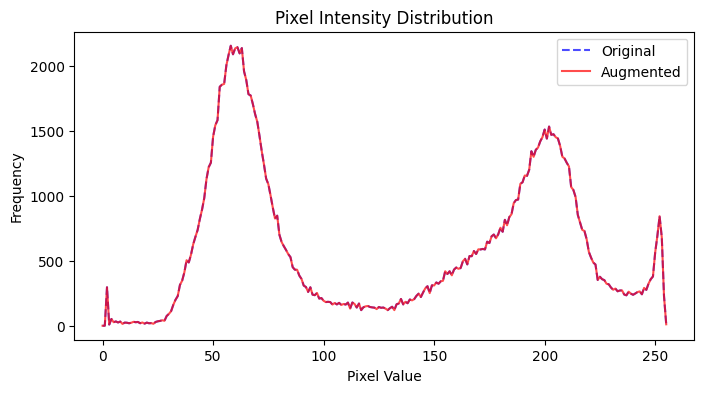

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Define a sample class and get a list of augmented images in that class
sample_class = "normal"  # Change this to another class if needed
sample_folder = os.path.join(output_path, "train", sample_class)  # Augmented dataset folder
sample_files = [f for f in os.listdir(sample_folder) if f.endswith((".png", ".jpg", ".jpeg"))]

# Ensure there are augmented images to compare
if not sample_files:
    print(f"No augmented images found in {sample_folder}")
else:
    # Pick the first augmented image
    sample_aug_file = sample_files[0]

    # Find the original image by removing the augmentation tag
    original_img_path = os.path.join(input_path, "train", sample_class, sample_aug_file.replace("_aug1", ""))
    augmented_img_path = os.path.join(sample_folder, sample_aug_file)

    # Read images in grayscale
    original_img = cv2.imread(original_img_path, cv2.IMREAD_GRAYSCALE)
    augmented_img = cv2.imread(augmented_img_path, cv2.IMREAD_GRAYSCALE)

    if original_img is None or augmented_img is None:
        print("Error loading images. Check file paths.")
    else:
        # Compute histograms
        orig_hist = cv2.calcHist([original_img], [0], None, [256], [0, 256])
        aug_hist = cv2.calcHist([augmented_img], [0], None, [256], [0, 256])

        # Plot histograms
        plt.figure(figsize=(8, 4))
        plt.plot(orig_hist, label="Original", color="blue", linestyle="dashed", alpha=0.7)
        plt.plot(aug_hist, label="Augmented", color="red", alpha=0.7)
        plt.legend()
        plt.title("Pixel Intensity Distribution")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.show()


In [ ]:
import collections

for split in ['train', 'test', 'valid']:
    class_counts = collections.defaultdict(int)
    folder_path = os.path.join(output_path, split)

    for class_name in os.listdir(folder_path):
        class_counts[class_name] = len(os.listdir(os.path.join(folder_path, class_name)))

    print(f"🗂 {split} dataset class distribution:", dict(class_counts))


🗂 train dataset class distribution: {'adenocarcinoma': 820, 'squamous.cell.carcinoma': 620, 'large.cell.carcinoma': 460, 'normal': 592}
🗂 test dataset class distribution: {'adenocarcinoma': 120, 'squamous.cell.carcinoma': 90, 'large.cell.carcinoma': 51, 'normal': 54}
🗂 valid dataset class distribution: {'adenocarcinoma': 23, 'squamous.cell.carcinoma': 15, 'large.cell.carcinoma': 21, 'normal': 13}


In [ ]:
print("Original Image Shape:", original_img.shape, "Data Type:", original_img.dtype)
print("Augmented Image Shape:", augmented_img.shape, "Data Type:", augmented_img.dtype)

Original Image Shape: (345, 440) Data Type: uint8
Augmented Image Shape: (345, 440) Data Type: uint8


In [ ]:
import os

# Path to the augmented dataset
augmented_dataset_path = "/content/drive/My Drive/Lung Cancer Dataset/Data"

# Function to count images in each category
def count_images_in_dataset(dataset_path):
    total_images = 0
    class_counts = {}

    for split in ['train', 'test', 'valid']:
        split_path = os.path.join(dataset_path, split)
        split_total = 0

        for class_name in os.listdir(split_path):
            class_path = os.path.join(split_path, class_name)
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

            class_counts[f"{split}/{class_name}"] = num_images
            split_total += num_images

        print(f"📂 {split.upper()} Dataset: {split_total} images")
        total_images += split_total

    return total_images, class_counts

# Get dataset details
total_images, class_counts = count_images_in_dataset(augmented_dataset_path)

print("\n📊 **Dataset Summary:**")
for category, count in class_counts.items():
    print(f"📌 {category}: {count} images")

print(f"\n✅ **Total Images in  Dataset:** {total_images}")


📂 TRAIN Dataset: 623 images
📂 TEST Dataset: 315 images
📂 VALID Dataset: 72 images

📊 **Dataset Summary:**
📌 train/normal: 148 images
📌 train/adenocarcinoma: 205 images
📌 train/large.cell.carcinoma: 115 images
📌 train/squamous.cell.carcinoma: 155 images
📌 test/normal: 54 images
📌 test/squamous.cell.carcinoma: 90 images
📌 test/adenocarcinoma: 120 images
📌 test/large.cell.carcinoma: 51 images
📌 valid/normal: 13 images
📌 valid/adenocarcinoma: 23 images
📌 valid/large.cell.carcinoma: 21 images
📌 valid/squamous.cell.carcinoma: 15 images

✅ **Total Images in  Dataset:** 1010


In [ ]:
import os

# Path to the augmented dataset
augmented_dataset_path = "/content/drive/My Drive/Lungcancer.Dataset.Augmented"

# Function to count images in each category
def count_images_in_dataset(dataset_path):
    total_images = 0
    class_counts = {}

    for split in ['train', 'test', 'valid']:
        split_path = os.path.join(dataset_path, split)
        split_total = 0

        for class_name in os.listdir(split_path):
            class_path = os.path.join(split_path, class_name)
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

            class_counts[f"{split}/{class_name}"] = num_images
            split_total += num_images

        print(f"📂 {split.upper()} Dataset: {split_total} images")
        total_images += split_total

    return total_images, class_counts

# Get dataset details
total_images, class_counts = count_images_in_dataset(augmented_dataset_path)

print("\n📊 **Dataset Summary:**")
for category, count in class_counts.items():
    print(f"📌 {category}: {count} images")

print(f"\n✅ **Total Images in Augmented Dataset:** {total_images}")


📂 TRAIN Dataset: 2492 images
📂 TEST Dataset: 315 images
📂 VALID Dataset: 72 images

📊 **Dataset Summary:**
📌 train/adenocarcinoma: 820 images
📌 train/squamous.cell.carcinoma: 620 images
📌 train/large.cell.carcinoma: 460 images
📌 train/normal: 592 images
📌 test/adenocarcinoma: 120 images
📌 test/squamous.cell.carcinoma: 90 images
📌 test/large.cell.carcinoma: 51 images
📌 test/normal: 54 images
📌 valid/adenocarcinoma: 23 images
📌 valid/squamous.cell.carcinoma: 15 images
📌 valid/large.cell.carcinoma: 21 images
📌 valid/normal: 13 images

✅ **Total Images in Augmented Dataset:** 2879


Found 2492 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Phase 1: Training top layers...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3522 - loss: 1.6859 - precision: 0.3845 - recall: 0.2667

156/156 ━━━━━━━━━━━━━━━━━━━━ 631s 4s/step - accuracy: 0.3527 - loss: 1.6847 - precision: 0.3851 - recall: 0.2672 - val_accuracy: 0.2917 - val_loss: 1.3547 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.5339 - loss: 1.1664 - precision: 0.5873 - recall: 0.4610

156/156 ━━━━━━━━━━━━━━━━━━━━ 59s 380ms/step - accuracy: 0.5340 - loss: 1.1662 - precision: 0.5874 - recall: 0.4611 - val_accuracy: 0.5694 - val_loss: 1.1064 - val_precision: 0.6667 - val_recall: 0.1667 - learning_rate: 1.0000e-04
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 386ms/step - accuracy: 0.5593 - loss: 1.0688 - precision: 0.6131 - recall: 0.4884 - val_accuracy: 0.5694 - val_loss: 1.0347 - val_precision: 0.6842 - val_recall: 0.3611 - learning_rate: 1.0000e-04
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.6169 - loss: 0.9066 - precision: 0.6757 - recall: 0.5462

156/156 ━━━━━━━━━━━━━━━━━━━━ 59s 380ms/step - accuracy: 0.6170 - loss: 0.9066 - precision: 0.6757 - recall: 0.5463 - val_accuracy: 0.5833 - val_loss: 0.9705 - val_precision: 0.6667 - val_recall: 0.5000 - learning_rate: 1.0000e-04
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.6427 - loss: 0.8821 - precision: 0.6870 - recall: 0.5757

156/156 ━━━━━━━━━━━━━━━━━━━━ 59s 380ms/step - accuracy: 0.6427 - loss: 0.8822 - precision: 0.6870 - recall: 0.5757 - val_accuracy: 0.6250 - val_loss: 0.9424 - val_precision: 0.6939 - val_recall: 0.4722 - learning_rate: 1.0000e-04
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 382ms/step - accuracy: 0.6620 - loss: 0.8635 - precision: 0.7094 - recall: 0.5941 - val_accuracy: 0.6250 - val_loss: 0.9161 - val_precision: 0.6727 - val_recall: 0.5139 - learning_rate: 1.0000e-04
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 59s 377ms/step - accuracy: 0.6700 - loss: 0.8438 - precision: 0.7115 - recall: 0.6065 - val_accuracy: 0.6111 - val_loss: 0.9218 - val_precision: 0.6667 - val_recall: 0.5278 - learning_rate: 1.0000e-04
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.6785 - loss: 0.7884 - precision: 0.7288 - recall: 0.6189

156/156 ━━━━━━━━━━━━━━━━━━━━ 59s 381ms/step - accuracy: 0.6785 - loss: 0.7885 - precision: 0.7287 - recall: 0.6189 - val_accuracy: 0.6528 - val_loss: 0.8706 - val_precision: 0.7000 - val_recall: 0.5833 - learning_rate: 1.0000e-04
Epoch 9/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 390ms/step - accuracy: 0.6812 - loss: 0.7574 - precision: 0.7256 - recall: 0.6204 - val_accuracy: 0.6250 - val_loss: 0.8620 - val_precision: 0.6792 - val_recall: 0.5000 - learning_rate: 1.0000e-04
Epoch 10/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.7035 - loss: 0.7136 - precision: 0.7426 - recall: 0.6506

156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 382ms/step - accuracy: 0.7036 - loss: 0.7136 - precision: 0.7427 - recall: 0.6507 - val_accuracy: 0.6667 - val_loss: 0.8620 - val_precision: 0.6885 - val_recall: 0.5833 - learning_rate: 1.0000e-04
Epoch 11/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 383ms/step - accuracy: 0.7038 - loss: 0.7531 - precision: 0.7452 - recall: 0.6535 - val_accuracy: 0.6667 - val_loss: 0.8479 - val_precision: 0.6885 - val_recall: 0.5833 - learning_rate: 1.0000e-04
Epoch 12/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 383ms/step - accuracy: 0.7280 - loss: 0.6612 - precision: 0.7680 - recall: 0.6832 - val_accuracy: 0.6250 - val_loss: 0.8439 - val_precision: 0.7097 - val_recall: 0.6111 - learning_rate: 1.0000e-04
Epoch 13/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 59s 376ms/step - accuracy: 0.7315 - loss: 0.6489 - precision: 0.7664 - recall: 0.6905 - val_accuracy: 0.6667 - val_loss: 0.8139 - val_precision: 0.7031 - val_recall: 0.6250 - learning_rate: 1.0000e-04
Epoch 14/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 58s

156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 382ms/step - accuracy: 0.7362 - loss: 0.6416 - precision: 0.7735 - recall: 0.7002 - val_accuracy: 0.6806 - val_loss: 0.8967 - val_precision: 0.7188 - val_recall: 0.6389 - learning_rate: 1.0000e-04
Epoch 16/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 58s 368ms/step - accuracy: 0.7561 - loss: 0.6234 - precision: 0.7964 - recall: 0.7168 - val_accuracy: 0.6528 - val_loss: 0.9206 - val_precision: 0.7213 - val_recall: 0.6111 - learning_rate: 1.0000e-04
Epoch 17/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.7698 - loss: 0.5754 - precision: 0.8053 - recall: 0.7248

156/156 ━━━━━━━━━━━━━━━━━━━━ 58s 374ms/step - accuracy: 0.7698 - loss: 0.5755 - precision: 0.8052 - recall: 0.7248 - val_accuracy: 0.7083 - val_loss: 0.7874 - val_precision: 0.7424 - val_recall: 0.6806 - learning_rate: 1.0000e-04
Epoch 18/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 59s 377ms/step - accuracy: 0.7691 - loss: 0.5829 - precision: 0.8023 - recall: 0.7359 - val_accuracy: 0.6806 - val_loss: 0.9184 - val_precision: 0.6970 - val_recall: 0.6389 - learning_rate: 1.0000e-04
Epoch 19/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 82s 377ms/step - accuracy: 0.7682 - loss: 0.5570 - precision: 0.8023 - recall: 0.7379 - val_accuracy: 0.6944 - val_loss: 0.9692 - val_precision: 0.7059 - val_recall: 0.6667 - learning_rate: 1.0000e-04
Epoch 20/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.7928 - loss: 0.5247 - precision: 0.8260 - recall: 0.7520

156/156 ━━━━━━━━━━━━━━━━━━━━ 58s 371ms/step - accuracy: 0.7927 - loss: 0.5248 - precision: 0.8259 - recall: 0.7520 - val_accuracy: 0.7222 - val_loss: 0.7587 - val_precision: 0.7286 - val_recall: 0.7083 - learning_rate: 1.0000e-04
Phase 2: Fine-tuning VGG19...
Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 90s 476ms/step - accuracy: 0.7610 - loss: 0.5938 - precision_1: 0.7918 - recall_1: 0.7344 - val_accuracy: 0.5556 - val_loss: 1.3263 - val_precision_1: 0.5781 - val_recall_1: 0.5139 - learning_rate: 1.0000e-05
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.8340 - loss: 0.4522 - precision_1: 0.8592 - recall_1: 0.8012

156/156 ━━━━━━━━━━━━━━━━━━━━ 64s 407ms/step - accuracy: 0.8341 - loss: 0.4521 - precision_1: 0.8592 - recall_1: 0.8012 - val_accuracy: 0.7500 - val_loss: 0.7165 - val_precision_1: 0.7576 - val_recall_1: 0.6944 - learning_rate: 1.0000e-05
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.8517 - loss: 0.3709 - precision_1: 0.8751 - recall_1: 0.8350

156/156 ━━━━━━━━━━━━━━━━━━━━ 82s 406ms/step - accuracy: 0.8518 - loss: 0.3709 - precision_1: 0.8751 - recall_1: 0.8350 - val_accuracy: 0.8056 - val_loss: 0.6230 - val_precision_1: 0.8286 - val_recall_1: 0.8056 - learning_rate: 1.0000e-05
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.8756 - loss: 0.3228 - precision_1: 0.8938 - recall_1: 0.8575

156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 403ms/step - accuracy: 0.8757 - loss: 0.3227 - precision_1: 0.8938 - recall_1: 0.8575 - val_accuracy: 0.8333 - val_loss: 0.5797 - val_precision_1: 0.8788 - val_recall_1: 0.8056 - learning_rate: 1.0000e-05
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 403ms/step - accuracy: 0.9260 - loss: 0.2277 - precision_1: 0.9335 - recall_1: 0.9024 - val_accuracy: 0.8333 - val_loss: 0.6359 - val_precision_1: 0.8529 - val_recall_1: 0.8056 - learning_rate: 1.0000e-05
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.9270 - loss: 0.2154 - precision_1: 0.9401 - recall_1: 0.9136

156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 401ms/step - accuracy: 0.9270 - loss: 0.2153 - precision_1: 0.9401 - recall_1: 0.9136 - val_accuracy: 0.8750 - val_loss: 0.5539 - val_precision_1: 0.8873 - val_recall_1: 0.8750 - learning_rate: 1.0000e-05
Epoch 7/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 407ms/step - accuracy: 0.9426 - loss: 0.1699 - precision_1: 0.9512 - recall_1: 0.9345 - val_accuracy: 0.8750 - val_loss: 0.4076 - val_precision_1: 0.8750 - val_recall_1: 0.8750 - learning_rate: 1.0000e-05
Epoch 8/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 401ms/step - accuracy: 0.9371 - loss: 0.1822 - precision_1: 0.9407 - recall_1: 0.9288 - val_accuracy: 0.8472 - val_loss: 0.4882 - val_precision_1: 0.8472 - val_recall_1: 0.8472 - learning_rate: 1.0000e-05
Epoch 9/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9542 - loss: 0.1423 - precision_1: 0.9580 - recall_1: 0.9465

156/156 ━━━━━━━━━━━━━━━━━━━━ 64s 408ms/step - accuracy: 0.9542 - loss: 0.1423 - precision_1: 0.9580 - recall_1: 0.9465 - val_accuracy: 0.8889 - val_loss: 0.4507 - val_precision_1: 0.8873 - val_recall_1: 0.8750 - learning_rate: 1.0000e-05
Epoch 10/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 398ms/step - accuracy: 0.9556 - loss: 0.1544 - precision_1: 0.9592 - recall_1: 0.9496 - val_accuracy: 0.8750 - val_loss: 0.5878 - val_precision_1: 0.8732 - val_recall_1: 0.8611 - learning_rate: 1.0000e-05
Epoch 11/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 399ms/step - accuracy: 0.9620 - loss: 0.1260 - precision_1: 0.9686 - recall_1: 0.9508 - val_accuracy: 0.8333 - val_loss: 0.7648 - val_precision_1: 0.8286 - val_recall_1: 0.8056 - learning_rate: 1.0000e-05
Epoch 12/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 406ms/step - accuracy: 0.9615 - loss: 0.1239 - precision_1: 0.9663 - recall_1: 0.9588 - val_accuracy: 0.8750 - val_loss: 0.4731 - val_precision_1: 0.8750 - val_recall_1: 0.8750 - learning_rate: 5.0000e-06
Epoch 13/30


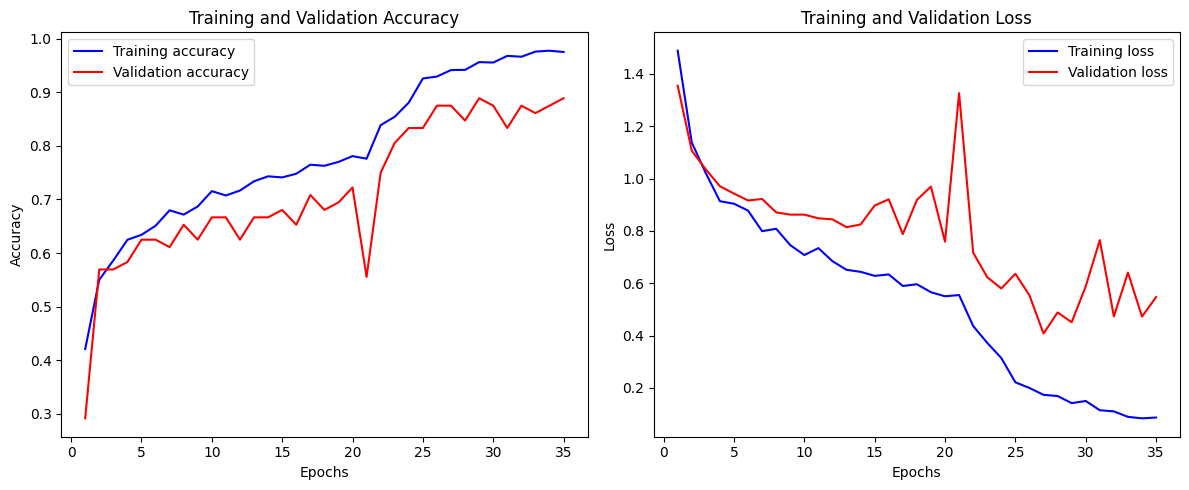

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step


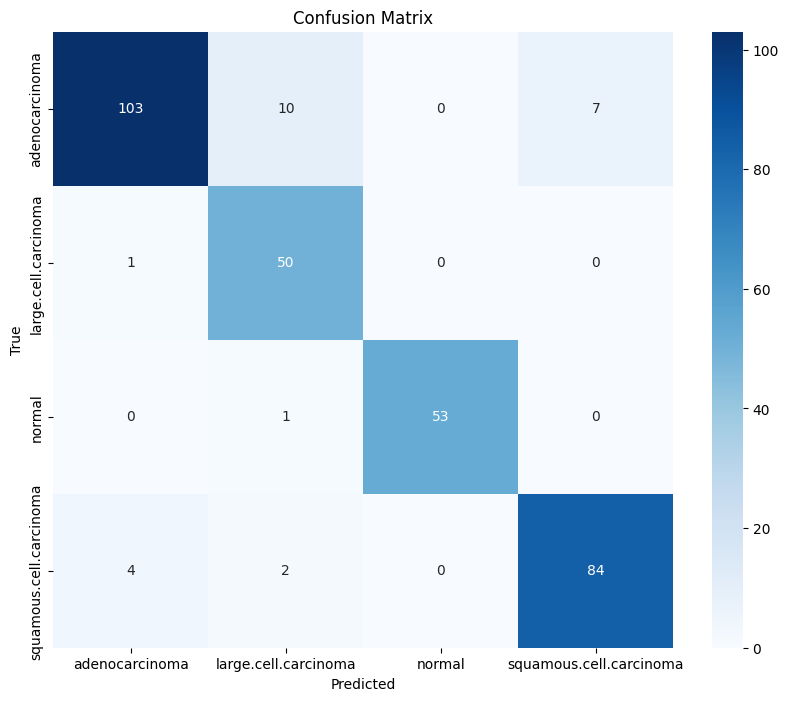

Classification Report:
                         precision    recall  f1-score   support

         adenocarcinoma       0.95      0.86      0.90       120
   large.cell.carcinoma       0.79      0.98      0.88        51
                 normal       1.00      0.98      0.99        54
squamous.cell.carcinoma       0.92      0.93      0.93        90

               accuracy                           0.92       315
              macro avg       0.92      0.94      0.92       315
           weighted avg       0.93      0.92      0.92       315



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils import class_weight
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Define dataset paths (update as needed)
train_dir = "/content/drive/My Drive/Lungcancer.Dataset.Augmented/train"
valid_dir = "/content/drive/My Drive/Lungcancer.Dataset.Augmented/valid"
test_dir  = "/content/drive/My Drive/Lungcancer.Dataset.Augmented/test"

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# Enhanced Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.9, 1.1],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.1  # If you want to split from training data
)

# Validation and Test preprocessing
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Load images using flow_from_directory
# Here we use separate directories for train and valid as provided.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Load VGG19 pre-trained on ImageNet, without the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model for initial training phase
for layer in base_model.layers:
    layer.trainable = False

# Build a new model with VGG19 as the base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(4, activation='softmax')  # 4 classes: adenocarcinoma, squamous cell carcinoma, large cell carcinoma, normal
])

# Compile the model for Phase 1 (train top layers only)
initial_lr = 1e-4
optimizer = Adam(learning_rate=initial_lr)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Define callbacks for early stopping, learning rate reduction, and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-7)
checkpoint = ModelCheckpoint('best_vgg19_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Compute class weights for balanced training
# class_weights = class_weight.compute_class_weight(
#     'balanced',
#     classes=np.unique(train_generator.classes),
#     y=train_generator.classes
# )
# class_weights_dict = dict(enumerate(class_weights))

# Phase 1: Train top layers with VGG19 frozen
print("Phase 1: Training top layers...")
history1 = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    # class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Phase 2: Fine-tuning - unfreeze some of the deeper layers of VGG19
print("Phase 2: Fine-tuning VGG19...")
# Unfreeze the last 10 layers of VGG19 for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
optimizer = Adam(learning_rate=1e-5)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

history2 = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    # class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Load the best model from checkpoints
model.load_weights('best_vgg19_model.h5')

# Evaluate on the test set
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2%}")
print(f"Test Precision: {test_precision:.2%}")
print(f"Test Recall: {test_recall:.2%}")

# Function to plot combined training history for both phases
def plot_training_history(history1, history2=None):
    acc = history1.history['accuracy']
    val_acc = history1.history['val_accuracy']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']

    if history2:
        acc += history2.history['accuracy']
        val_acc += history2.history['val_accuracy']
        loss += history2.history['loss']
        val_loss += history2.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
# Plot the training history for both phases
plot_training_history(history1, history2)

# Generate predictions on the test set and plot a confusion matrix
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [ ]:
model.save("/content/drive/My Drive/BESTfinallung_cancer_vgg19_model.h5")